In [6]:
import Pkg
Pkg.add("LaTeXStrings")
Pkg.add("Plots")

    Updating registry at `C:\Users\Ericka\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Ericka\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\Ericka\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Ericka\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\Ericka\.julia\environments\v1.8\Manifest.toml`


In [7]:
using Plots
using LaTeXStrings

# Modelo de Hodgkin-Huxley
El modelo de Hodgkin-Huxley fue propuesto en 1952 tras haber estudiado la fisiología del axón gigante del calamar y marcó un hito en historia de la neurociencia, a partir de ese momento muchos modelos se han desarrollado tomándolo como base. En su forma clásica el modelo se define como un sistema de cuatro equaciones diferenciales como se muestra a continuación:

\begin{align*}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) \\
                   &- g_L (V - E_L) + I_{ext} \\
 \frac{1}{\gamma(T)} \frac{dn}{dt} &= \alpha_n(V) (1 - n) - \beta_n(V)n = \frac{n^{\infty}(V) - n}{\tau_n(V)} \\
 \frac{1}{\gamma(T)} \frac{dm}{dt} &= \alpha_m(V) (1 - m) - \beta_m(V)m = \frac{m^{\infty}(V) - m}{\tau_m(V)} \\
 \frac{1}{\gamma(T)} \frac{dh}{dt} &= \alpha_h(V) (1 - h) - \beta_h(V)h = \frac{h^{\infty}(V) - h}{\tau_h(V)} \\
 \tau_n(V) &= \frac{1}{\alpha_n(V) + \beta_n(V)} \\
 n_{\infty}(V) &= \frac{\alpha_n(V)}{\alpha_n(V) + \beta_n(V)}
\end{align*}

en donde:
* $V$ la diferencia de potencial en la membrana
* $C_m = 1.0\ \mu\text{F/cm}^2$ la capacitancia de la membrana por unidad de área
* $g_{Na} = 120\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el sodio
* $g_{K} = 36\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el potasio
* $g_{L} = 0.3\ \text{mS/cm}^2$ la conductancia adicional, independiente del voltaje
* $E_{Na} = 55\ \text{mV}$ el voltaje de la batería en la compuerta de sodio
* $E_{K} = -72\ \text{mV}$ el voltaje de la batería en la compuerta de potasio
* $E_{L} = -49.387\ \text{mV}$ el voltaje filtrado
* $\gamma(T)$ es una constante de proporcionalidad temporal que depende de la temperatura $T$, a $6.3°$C vale $1$ [Cessac2009].

para el caso del calamar.  Los potenciales están medidos considerando que la membrana se encuentra en su potencial de reposo a los $V_r = -60\ \text{mV}$.  Las corrientes $I$ están medidas en $\mu$A/cm$^2$.

Las funciones de transición $\alpha(V)$ y $\beta(V)$, fueron determinadas experimentalmente.  Su forma general es:
\begin{align}
  \alpha(V) \text{ ó } \beta(V) = \frac{A + BV}{C + H e^{\left(\frac{V+D}{F}\right)}}
\end{align}
donde $V$ está medido con respecto al potencial de reposo $V_r$.

Los valores medidos por Hodkin y Huxley para la compuerta de **potasio (K)**, fueron:

\begin{align}
  \alpha_n(V) &= \frac{0.01(10 - V)}{e^{\left(\frac{10-V}{10}\right)} - 1}
\end{align}

\begin{align}
  \beta_n(V) = 0.125 e^{-\frac{V}{80}}
\end{align}

Observemos que cuando $V = 10$ la función $\alpha_n$ está indefinida.  Utilizando la regla de L'Hopital, se calcula el límite:
\begin{align}
  \alpha_n(10) = \frac{-0.01}{e^{\left(\frac{10-V}{10}\right)}(-0.1)} = \frac{-0.01}{-0.1} = 0.1
\end{align}

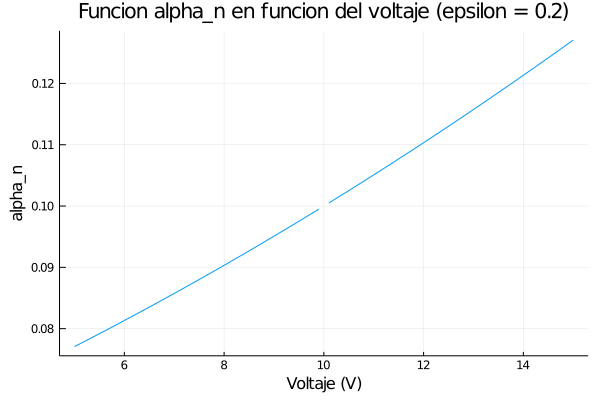

In [67]:
## Programa las función alfa_n como función del voltaje V.
## Necesitarás definir un caso especial cuando V - 10 < epsilon
## Utiliza esta celda para ver como se comporta tu función en esta vecindad
## y elegir un valor de epsilon adecuado


function alpha_n(V)
  return 0.01 * (10 .- V) / (exp((10 .- V) / 10) .- 1)    
end

# Colocamos el rango de voltajes para graficar
voltages = 5:0.1:15

# Colocamos el valor de epsilon (el valor lo podemos modificar)
epsilon = 0.2

# Calculamos los valores de alpha_n para cada voltaje
alpha_values = [alpha_n(voltage, epsilon) for voltage in voltages]

# Graficamos la función alpha_n en función del voltaje
plot(voltages, alpha_values, xlabel = "Voltaje (V)", ylabel = "alpha_n",
    title = "Funcion alpha_n en funcion del voltaje (epsilon = $epsilon)", legend = false)

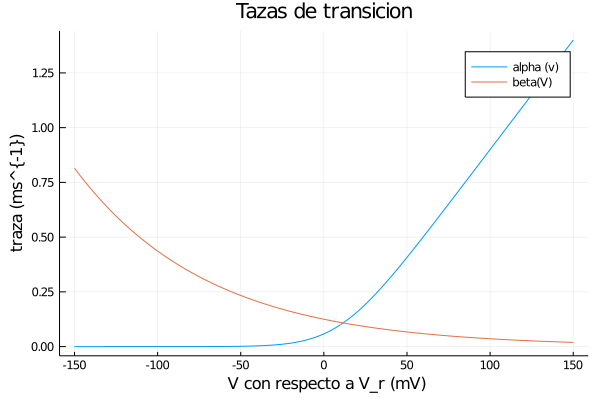

In [68]:
## Programa la funciones como función del voltaje V, para la compuerta de K
## Genera luego una gráfica de alfa_n y beta_n

function beta_n(V)
     return map(v -> 0.125 * exp(-v / 80), V)
end
 
function alpha_n(V)
        numerator = map(v -> 0.01 * (10 - v) / (exp((10 - v) / 10) - 1), V)
    return numerator

end

# Rango de voltajes para graficar
voltages = -150:0.1:150 

# Calcula los valores de beta_n para cada voltaje
beta_values = [beta_n(voltage) for voltage in voltages]

# Calculamos los valores de alpha_n para cada voltaje
alpha_values = [alpha_n(voltage) for voltage in voltages]

# Graficar las funciones alpha_n y beta_n en función del voltaje
plot(voltages, alpha_values, label = "alpha (v)", xlabel = " V con respecto a V_r (mV)", ylabel = "traza (ms^{-1})", title = "Tazas de transicion")
plot!(voltages, beta_values, label = "beta(V)")



Las funciones para el **sodio (Na)** son:
\begin{align}
  \alpha_m(V) &= \frac{0.1(25 - V)}{e^{\left(\frac{25-V}{10}\right)} - 1}
\end{align}

\begin{align}
  \beta_m(V) &= 4 e^{-\frac{V}{18}}
\end{align}

\begin{align}
  \alpha_h(V) &= 0.07 e^{-\frac{V}{20}}
\end{align}

\begin{align}
  \beta_h(V) &= \frac{1}{e^{\left(\frac{30-V}{10}\right)} + 1}
\end{align}

Para $\alpha_m$ cuando $V = 25$, utilizamos la regla de L'Hopital para calcular el límite:
\begin{align}
  \alpha_m(25) = \frac{-0.1}{e^{\left(\frac{25-V}{10}\right)}(-0.1)} = \frac{-0.1}{-0.1} = 1
\end{align}

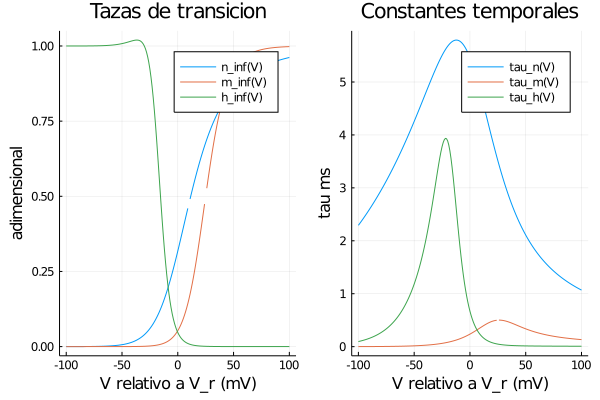

In [83]:
## Dadas alfa y beta, calcular ahora y graficar n y tau para ambos canales.

## Agrega las funciones correspondientes para la compuerta de sodio también,
## deduce sus definiciones a partir de las llamadas en la función para graficar
 
function alpha_m(V)
    numerator = 0.1 * (25 - V)
    denominator = exp((25 - V) / 10) - 1
    return numerator / denominator
end

function beta_m(V)
    return 4 * exp(-V / 18)
end

function alpha_h(V)
    return 0.07 * exp.(-collect(V) / 20)
end

function beta_h(V)
    V_vec = collect(V)
    numerator = 30 .+ V_vec
    denominator = exp.((30 .- V_vec) ./ 10) .+ 1
    return numerator ./ denominator
end

function tau_inf(alpha, beta)
    tau = 1 ./ (alpha + beta)
    tau_inf = alpha ./ (alpha + beta)
    return tau, tau_inf
end

function n_inf(alpha, beta)
    n = alpha ./ (alpha + beta)
    n_inf = alpha ./ (alpha + beta)
    return n, n_inf
end

function plotParameters()
    V = range(-100, stop=100, length=201)

    alpha_n(V) = 0.01 * (10 - V) ./ (exp((10 - V) ./ 10) - 1)
    beta_n(V) = 0.125 * exp(-V ./ 80)

    n_inf_n = n_inf(alpha_n.(V), beta_n.(V))
    tau_inf_n = tau_inf(alpha_n.(V), beta_n.(V))

    n_inf_m = n_inf(alpha_m.(V), beta_m.(V))
    tau_inf_m = tau_inf(alpha_m.(V), beta_m.(V))

    n_inf_h = n_inf(alpha_h.(V), beta_h.(V))
    tau_inf_h = tau_inf(alpha_h.(V), beta_h.(V))

    p1 = plot(V, [n_inf_n[1], n_inf_m[1], n_inf_h[1]], label=["n_inf(V)" "m_inf(V)" "h_inf(V)"])
    p2 = plot(V, [tau_inf_n[1], tau_inf_m[1], tau_inf_h[1]], label=["tau_n(V)" "tau_m(V)" "tau_h(V)"])

    plot(p1, p2, layout=(1, 2), title=["Tazas de transicion" "Constantes temporales"], xlabel="V relativo a V_r (mV)", ylabel=["adimensional" "tau ms"], legend=true)
end

plotParameters()


![tasas_constantes](figuras/tazas-y-constantes.jpg)

## Simulación con el método numérico de Euler

El método de Euler realiza una aproximación a la función por su tangente.  Dada una ecuación diferencial de la forma:

\begin{align}
  \frac{dy(t)}{dt} = f(y(t))
\end{align}

Partimos de un punto inicial $(t_0, y_0)$ y calculamos el valor de $y$ para el tiempo $t + \Delta t$ en dicho punto iterativamente como:

\begin{align}
  y(t + \Delta t) &= y(t) + \Delta t f(y(t))
\end{align}

El error aproximado por realizar esta aproximación es:
\begin{align}
  E =& \frac{1}{2} \frac{df(t)}{dt}(\Delta t)^2
\end{align}

Aplicando esta fórmula a la ecuación para los canales:

\begin{align}
 \frac{dn}{dt} &= \frac{n^{\infty}(V) - n}{\tau_n(V)}
\end{align}

Obtenemos:

\begin{align}
 n(t + \Delta t) =& n(t) + \Delta t \left[\frac{n^{\infty}(V)}{\tau_n} - \frac{n(t)}{\tau_n(V)} \right] \\
                 =& \left[ 1 - \frac{\Delta t}{\tau_n(V)} \right] n(t) + \frac{\Delta t}{\tau_n(V)}n^{\infty}(V)
\end{align}

Se obtienen fórmulas análogas para $m$ y $h$.  Todas juntas pueden ser escritas en forma matricial:

\begin{align}
  \begin{bmatrix}
  n(t + \Delta t) \\
  m(t + \Delta t) \\
  h(t + \Delta t)
  \end{bmatrix} =& 
  \begin{bmatrix}
  (1 - \Delta t/\tau_n(V)) & 0 & 0 \\
  0 & (1 - \Delta t/\tau_m(V)) & 0 \\
  0 & 0 & (1 - \Delta t/\tau_h(V)) \\
  \end{bmatrix}
  \begin{bmatrix}
  n(t) \\
  m(t) \\
  h(t)
  \end{bmatrix} +
  \begin{bmatrix}
  (\Delta t / \tau_n(V)) n^{\infty}(V) \\
  (\Delta t / \tau_m(V)) m^{\infty}(V) \\
  (\Delta t / \tau_h(V)) h^{\infty}(V)
  \end{bmatrix}
\end{align}

Brevemente:

\begin{align}
  \boldsymbol{\Pi}(t + \Delta t) =& \boldsymbol{A}_\pi \boldsymbol{\Pi}(t) + \boldsymbol{B}_\pi
\end{align}

Se debe realizar el mismo procedimiento con la ecuación diferencial para el voltaje.  Para simplificar la notación, introduzcamos:

\begin{align}
  G_{Na} = g_{Na}m^3h
\end{align}

\begin{align}
  G_{K} = g_K n^4
\end{align}

Entonces:
\begin{align}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) - g_L (V - E_L) + I_{ext} \\
 \frac{dV}{dt} &= -\frac{G_{Na}}{C_m}(V-E_{Na}) - \frac{G_K}{C_m} (V - E_K) - \frac{g_L}{C_m} (V - E_L) + \frac{1}{C_m}I_{ext}
\end{align}

Utilizando el método de Euler:

\begin{align}
 V(t + \Delta t) &= V(t) - \frac{\Delta t}{C_m} \left[ G_{Na}(V-E_{Na}) + G_K (V - E_K) + g_L (V - E_L) + I_{ext}(t) \right] \\
 V(t + \Delta t) &= V(t) - \Delta t \begin{bmatrix} \frac{G_{Na}}{C_m} & \frac{G_K}{C_m} & \frac{g_L}{C_m} \end{bmatrix}  \begin{bmatrix}
                 V(t)-E_{Na} \\
                 V(t)- E_K \\
                 V(t) - E_L
                \end{bmatrix} + \frac{\Delta t}{C_m}I_{ext}(t)
\end{align}

Para los valores por defecto propuestos en la celda siguiente, programar una simulación utilizando los resultados obtenidos con el método de Euler y produce la figura siguiente:

![simulacion](figuras/Simulacion.png)

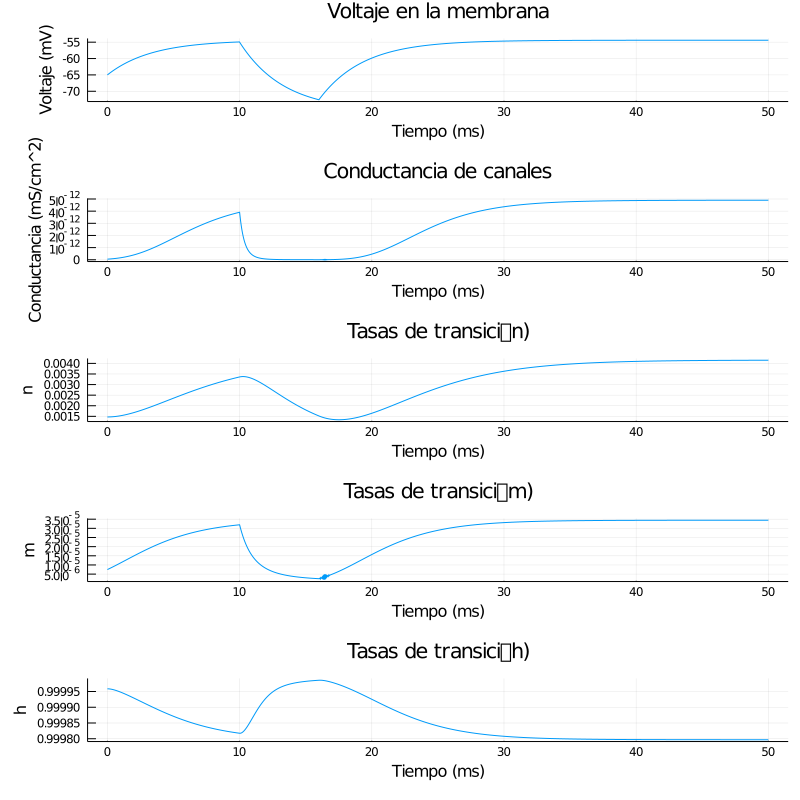

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to un

In [102]:
# NOTA
# Los diccionarios son objectos que almacenan datos de la forma llave-valor (key-value)
# muy útiles para trabajar con información que tiene que ser etiquetada. Puedes encontrar más
# información sobre como trabajar con ellos en la documentación oficial de Julia:
# https://docs.julialang.org/en/v1/base/collections/#Dictionaries

function euler_simulation(parametros)
    # Extraemos los parámetros del diccionario
    DeltaT = parametros["DeltaT"]
    maxT = parametros["maxT"]
    V0 = parametros["V0"]
    gNa = parametros["gNa"]
    gK = parametros["gK"]
    gL = parametros["gL"]
    Cm = parametros["Cm"]
    ENa = parametros["ENa"]
    EK = parametros["EK"]
    EL = parametros["EL"]

    # Funciones de alfa y beta
    alpha_n(V) = 0.01 * (10 - V) / (exp((10 - V) / 10) - 1)
    beta_n(V) = 0.125 * exp(-V / 80)

    alpha_m(V) = 0.1 * (25 - V) / (exp((25 - V) / 10) - 1)
    beta_m(V) = 4 * exp(-V / 18)

    alpha_h(V) = 0.07 * exp(-V / 20)
    beta_h(V) = 1 / (exp((30 - V) / 10) + 1)

    # Función para la corriente externa
    function makeIext(t_start, t_end, amplitude)
        return function(t)
            if t >= t_start && t <= t_end
                return amplitude
            else
                return 0.0
            end
        end
    end

    # Inicialización de variables
    V = [V0]
    n = [alpha_n(V0) / (alpha_n(V0) + beta_n(V0))]
    m = [alpha_m(V0) / (alpha_m(V0) + beta_m(V0))]
    h = [alpha_h(V0) / (alpha_h(V0) + beta_h(V0))]

    t = collect(0:DeltaT:maxT)

    # Simulación
    for i in 2:length(t)
        # Tazas de transición
        n_inf_val = alpha_n(V[i-1]) / (alpha_n(V[i-1]) + beta_n(V[i-1]))
        m_inf_val = alpha_m(V[i-1]) / (alpha_m(V[i-1]) + beta_m(V[i-1]))
        h_inf_val = alpha_h(V[i-1]) / (alpha_h(V[i-1]) + beta_h(V[i-1]))

        # Constantes temporales
        tau_n_val = 1 / (alpha_n(V[i-1]) + beta_n(V[i-1]))
        tau_m_val = 1 / (alpha_m(V[i-1]) + beta_m(V[i-1]))
        tau_h_val = 1 / (alpha_h(V[i-1]) + beta_h(V[i-1]))

        # Conductancias
        gNa_val = gNa * (m[i-1]^3) * h[i-1]
        gK_val = gK * (n[i-1]^4)
        gL_val = gL

        # Corriente externa
        Iext = makeIext(10.0, 16.0, 6.5)
        Iext_val = Iext(t[i])

        # Cálculo del siguiente paso
        V_new = V[i-1] - (DeltaT / Cm) * (gNa_val * (V[i-1] - ENa) + gK_val * (V[i-1] - EK) + gL_val * (V[i-1] - EL) + Iext_val)
        n_new = n[i-1] + (DeltaT / tau_n_val) * (n_inf_val - n[i-1])
        m_new = m[i-1] + (DeltaT / tau_m_val) * (m_inf_val - m[i-1])
        h_new = h[i-1] + (DeltaT / tau_h_val) * (h_inf_val - h[i-1])

        # Agregmos nuevos valores a las listas
        push!(V, V_new)
        push!(n, n_new)
        push!(m, m_new)
        push!(h, h_new)
    end

    # Graficamos resultados
    p1 = plot(t, V, xlabel="Tiempo (ms)", ylabel="Voltaje (mV)", legend=false, title="Voltaje en la membrana")
    p2 = plot(t, [gNa * (m[i]^3) * h[i] for i in 1:length(t)], xlabel="Tiempo (ms)", ylabel="Conductancia (mS/cm^2)", legend=false, title="Conductancia de canales")
    p3 = plot(t, n, xlabel="Tiempo (ms)", ylabel="n", legend=false, title="Tasas de transición (n)")
    p4 = plot(t, m, xlabel="Tiempo (ms)", ylabel="m", legend=false, title="Tasas de transición (m)")
    p5 = plot(t, h, xlabel="Tiempo (ms)", ylabel="h", legend=false, title="Tasas de transición (h)")

    # Mostramos las gráficas
    plot(p1, p2, p3, p4, p5, layout=(5,1), size=(800,800))
end

# Definimos los parámetros
parametros = Dict(
    "DeltaT" => 0.01,
    "maxT" => 50.0,
    "V0" => -65.0,
    "gNa" => 120.0,
    "gK" => 36.0,
    "gL" => 0.3,
    "Cm" => 1.0,
    "ENa" => 50.0,
    "EK" => -77.0,
    "EL" => -54.4
)

# Ejecutamos la simulación
euler_simulation(parametros)


In [100]:

# Implementa aquí el resultado del algoritmo de intregración numérica de Euler para calcular V(t).
# Asegúrate de que, al ejecutar la simulación con los parámetros por defecto, se reproduce la imagen de arriba.
# Después prueba con pulsos de t en 10->30, con corrientes de 10 y -10 microamperes
# ¿Qué observas?
# Inserta al final una celda con tus comentarios y resultados

function EulerHodkinHuxley(parametros)
    """Devuelve la solucion a las ecuaciones diferenciales del modelo de Hodgkin
    y Huxley utilizando el metodo de Euler
    """
end
  

function plotSimulation(resultado)
    tiempo = resultado["T"]
    
    p1 = plot(tiempo, resultado["V"])
    p2 = plot(tiempo, [resultado["GK"], resultado["GNa"]], label=[L"G_{K}" L"G_{Na}"])
    p3 = plot(tiempo, [resultado["n"], resultado["m"], resultado["h"]], label=[L"n" L"m" L"h"])
    p4 = plot(tiempo, [resultado["tauN"], resultado["tauM"], resultado["tauH"]], label=[L"\tau_n" L"\tau_m" L"\tau_h"])

    plot(
        p1,
        p2,
        p3,
        p4,
        layout=(2, 2),
        title=["Voltaje en la membrana" "Conductancia de los canales" "Tazas de transición" "Constantes temporales"],
        xlabel="t (ms)",
        ylabel=["Voltaje relativo en la membrana (mV)" L"Conductancia (mS/cm^2)" "adimensional" L"\tau (ms)"],
        legend=true
    )
end
    

function simulaHodkinHuxley(V0, t0, tfin, current)
    iext_func = makeIext(t0, tfin, current)
    parametros["V0"] = V0
    resultado = EulerHodkinHuxley(parametros)
    plotSimulation(resultado)
end


V0 = 0
t0 = 10
tfin = 16 # seleccionar de: -90 a 120
current = 2.4 # seleccionar de: -10 a 10

simulaHodkinHuxley(V0, t0, tfin, current)

LoadError: MethodError: no method matching getindex(::String, ::String)
[0mClosest candidates are:
[0m  getindex(::AbstractString, [91m::Colon[39m) at strings/basic.jl:189
[0m  getindex(::String, [91m::Int64[39m) at strings/string.jl:226
[0m  getindex(::String, [91m::UnitRange{Int64}[39m) at strings/string.jl:261
[0m  ...

# Comentarios y resultados
Escribe aquí tus resultados